#### 1. **Introduction to Decision Trees**

A **decision tree** is a popular supervised learning algorithm used for both classification and regression tasks. In classification, the goal is to predict the class label of an observation by splitting the data based on feature values in a tree-like structure.

- **Root Node**: The first node in the decision tree.
- **Internal Nodes**: Nodes that represent decisions based on features.
- **Leaf Nodes**: Terminal nodes that contain the predicted class.

The decision tree makes predictions by following a path from the root to a leaf node.

---

#### 2. **The Gini Index for Splitting**

The **Gini Index** is a metric used to determine how "pure" a split is when creating a decision tree. It is commonly used in classification tasks to evaluate splits at each node.

**Formula for Gini Index**:

For a binary classification problem, if a node contains \(p\) proportion of Class 1 and \(1-p\) proportion of Class 2, the Gini Index for that node is:

$$
Gini = 1 - (p^2 + (1 - p)^2)
$$

The Gini Index measures the impurity of a node. A Gini Index of 0 means the node is pure (all examples belong to one class), while a value closer to 1 indicates high impurity.

**Example**:  
If a node contains 70% Class A and 30% Class B:
$$
Gini = 1 - (0.7^2 + 0.3^2) = 1 - (0.49 + 0.09) = 1 - 0.58 = 0.42
$$

---

#### 3. **Step-by-Step Example of Gini Calculation**

Consider the following dataset:

| Feature | Class |
|---------|-------|
| 1.5     | A     |
| 2.0     | A     |
| 2.5     | B     |
| 3.0     | B     |
| 3.5     | B     |

We want to split this dataset based on the feature value at 2.5:

- **Before Split**:  
  Gini Index for the entire dataset:
  - 2 out of 5 are Class A → $ p = \frac{2}{5} = 0.4 $
  - 3 out of 5 are Class B →  $ 1 - p = 0.6 $
  $$
  Gini = 1 - (0.4^2 + 0.6^2) = 1 - (0.16 + 0.36) = 1 - 0.52 = 0.48
  $$

- **After Split**:
  - Left node (Feature < 2.5): \(p = 1/2 = 0.5\), \(1 - p = 0.5\)
    $$
    Gini = 1 - (0.5^2 + 0.5^2) = 1 - (0.25 + 0.25) = 1 - 0.5 = 0.5
    $$
  - Right node (Feature ≥ 2.5): \(p = 1/3 = 0.33\), \(1 - p = 0.67\)
    $$
    Gini = 1 - (0.33^2 + 0.67^2) = 1 - (0.11 + 0.45) = 1 - 0.56 = 0.44
    $$

The Gini Index for the split is a weighted sum of the Gini Indexes of the child nodes.

---

#### 4. **Python Code Example Using the Gini Index**

Here’s an implementation of a decision tree using the Gini Index in Python with the `scikit-learn` library:

Accuracy: 1.00


[Text(0.5, 0.75, 'Feature <= 2.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = B'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = A'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = B'),
 Text(0.625, 0.5, '  False')]

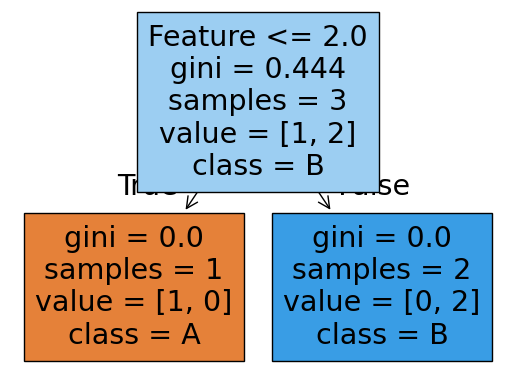

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Step 1: Create a simple dataset
data = {'Feature': [1.5, 2.0, 2.5, 3.0, 3.5],
        'Class': ['A', 'A', 'B', 'B', 'B']}

df = pd.DataFrame(data)

# Step 2: Define features and target
X = df[['Feature']]  # Feature column
y = df['Class']      # Target variable

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize the Decision Tree Classifier with Gini as the criterion
clf = DecisionTreeClassifier(criterion='gini')

# Step 5: Train the model
clf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 8: Visualize the decision tree
tree.plot_tree(clf, feature_names=['Feature'], class_names=['A', 'B'], filled=True)

**Explanation**:
- **Step 1**: We create a small dataset with a single feature and class labels.
- **Step 2**: The features (X) are the feature values, while the target (y) is the class labels.
- **Step 3**: We split the dataset into training and testing sets.
- **Step 4**: We initialize a decision tree classifier with the Gini Index as the criterion.
- **Step 5**: We train the model using the training set.
- **Step 6**: We use the trained model to make predictions on the test set.
- **Step 7**: We evaluate the model’s accuracy.
- **Step 8**: We plot the decision tree for visualization.

---

#### 5. **Conclusion**

The decision tree algorithm is a powerful and interpretable classification tool. Using the Gini Index, the algorithm can effectively split data into pure or nearly pure classes. Decision trees are easy to visualize and interpret, but they can overfit the data, especially when the tree becomes very deep.

**Homework**:  
Use the decision tree model to classify a more complex dataset. Experiment with different values for `max_depth` and `min_samples_split` to control the size of the tree and observe how the model’s accuracy changes.